In [66]:
import numpy as np
import pandas as pd


In [67]:
train_df = pd.read_csv("mnist_train.csv")

In [68]:
test_df = pd.read_csv("mnist_test.csv")


In [69]:
train_df.shape

(60000, 785)

In [70]:
test_df.shape

(10000, 785)

In [71]:
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
test_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [84]:
train_df.duplicated().sum()

np.int64(0)

In [85]:
test_df.duplicated().sum()

np.int64(0)

###Training and Test Split


In [73]:
X_train = train_df.iloc[:, 1:].values / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values


In [74]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(f"Train: {X_train.shape}, Test: {X_test}")

Train: (60000, 784), Test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
def One_hot(y, n_classes = 10):
    return np.eye(n_classes)[y]

Y_train = One_hot(y_train)
Y_test = One_hot(y_test)

##Neural network from scratch

In [76]:
class NeuralNetwork:
    def __init__(self, input_size=784, hidden_size=128, output_size=10):

        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_deriv(self, Z):
        return (Z > 0).astype(float)

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, Y, output):
        m = X.shape[0]
        # output Layer
        dZ2 = output - Y
        dW2 = self.A1.T.dot(dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        # Hidden laye
        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * self.relu_deriv(self.Z1)
        dW1 = X.T.dot(dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2, lr=0.1):
        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def accuracy(self, X, Y):
        preds = self.predict(X)
        return np.mean(preds == np.argmax(Y, axis=1))


In [77]:
#Training
def train_model(model, X_train, Y_train, X_val, Y_val, epochs=50, lr=0.1, batch_size=32):
    losses = []
    accuracies = []

    n_samples = X_train.shape[0]

    # Forming minni batches
    for epoch in range(epochs):

        indices = np.random.permutation(n_samples)
        X_train_shuf = X_train[indices]
        Y_train_shuf = Y_train[indices]

        epoch_loss = 0
        for i in range(0, n_samples, batch_size):
            X_batch = X_train_shuf[i:i+batch_size]
            Y_batch = Y_train_shuf[i:i+batch_size]

            output = model.forward(X_batch)
            loss = -np.mean(np.sum(Y_batch * np.log(output + 1e-8), axis=1))
            epoch_loss += loss

            dW1, db1, dW2, db2 = model.backward(X_batch, Y_batch, output)
            model.update_params(dW1, db1, dW2, db2, lr)

        val_acc = model.accuracy(X_val, Y_val)
        losses.append(epoch_loss / (n_samples // batch_size))
        accuracies.append(val_acc)


        print(f"Epoch {epoch+1}/{epochs}: Loss={losses[-1]:.4f}, Val Acc={val_acc:.4f}s")

        if epoch % 10 == 0:
            lr *= 0.9

    return losses, accuracies

In [78]:
X_train_split, X_val, Y_train_split, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

model = NeuralNetwork(hidden_size=128)
print("Training Neural Network...")
losses, accuracies = train_model(model, X_train_split, Y_train_split,
                               X_val, Y_val, epochs=30, lr=0.5)

train_acc = model.accuracy(X_train, Y_train)
test_acc = model.accuracy(X_test, Y_test)
print(f"\n=== FINAL RESULTS ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

Training Neural Network...
Epoch 1/30: Loss=0.2355, Val Acc=0.9377s
Epoch 2/30: Loss=0.1041, Val Acc=0.9680s
Epoch 3/30: Loss=0.0743, Val Acc=0.9708s
Epoch 4/30: Loss=0.0580, Val Acc=0.9773s
Epoch 5/30: Loss=0.0471, Val Acc=0.9725s
Epoch 6/30: Loss=0.0399, Val Acc=0.9765s
Epoch 7/30: Loss=0.0340, Val Acc=0.9750s
Epoch 8/30: Loss=0.0240, Val Acc=0.9750s
Epoch 9/30: Loss=0.0213, Val Acc=0.9763s
Epoch 10/30: Loss=0.0166, Val Acc=0.9790s
Epoch 11/30: Loss=0.0123, Val Acc=0.9775s
Epoch 12/30: Loss=0.0078, Val Acc=0.9812s
Epoch 13/30: Loss=0.0043, Val Acc=0.9808s
Epoch 14/30: Loss=0.0026, Val Acc=0.9802s
Epoch 15/30: Loss=0.0015, Val Acc=0.9822s
Epoch 16/30: Loss=0.0010, Val Acc=0.9820s
Epoch 17/30: Loss=0.0008, Val Acc=0.9827s
Epoch 18/30: Loss=0.0007, Val Acc=0.9818s
Epoch 19/30: Loss=0.0006, Val Acc=0.9823s
Epoch 20/30: Loss=0.0005, Val Acc=0.9817s
Epoch 21/30: Loss=0.0005, Val Acc=0.9817s
Epoch 22/30: Loss=0.0004, Val Acc=0.9813s
Epoch 23/30: Loss=0.0004, Val Acc=0.9818s
Epoch 24/30: Los

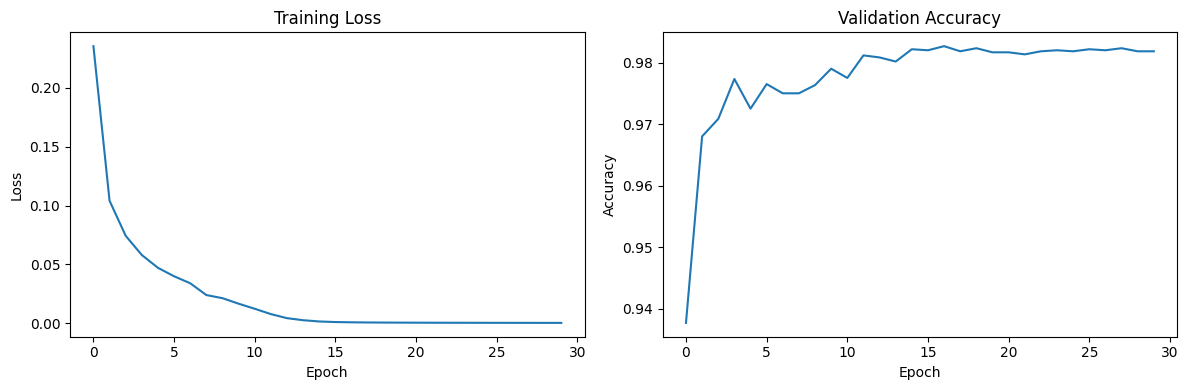

In [79]:
# Plot Results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

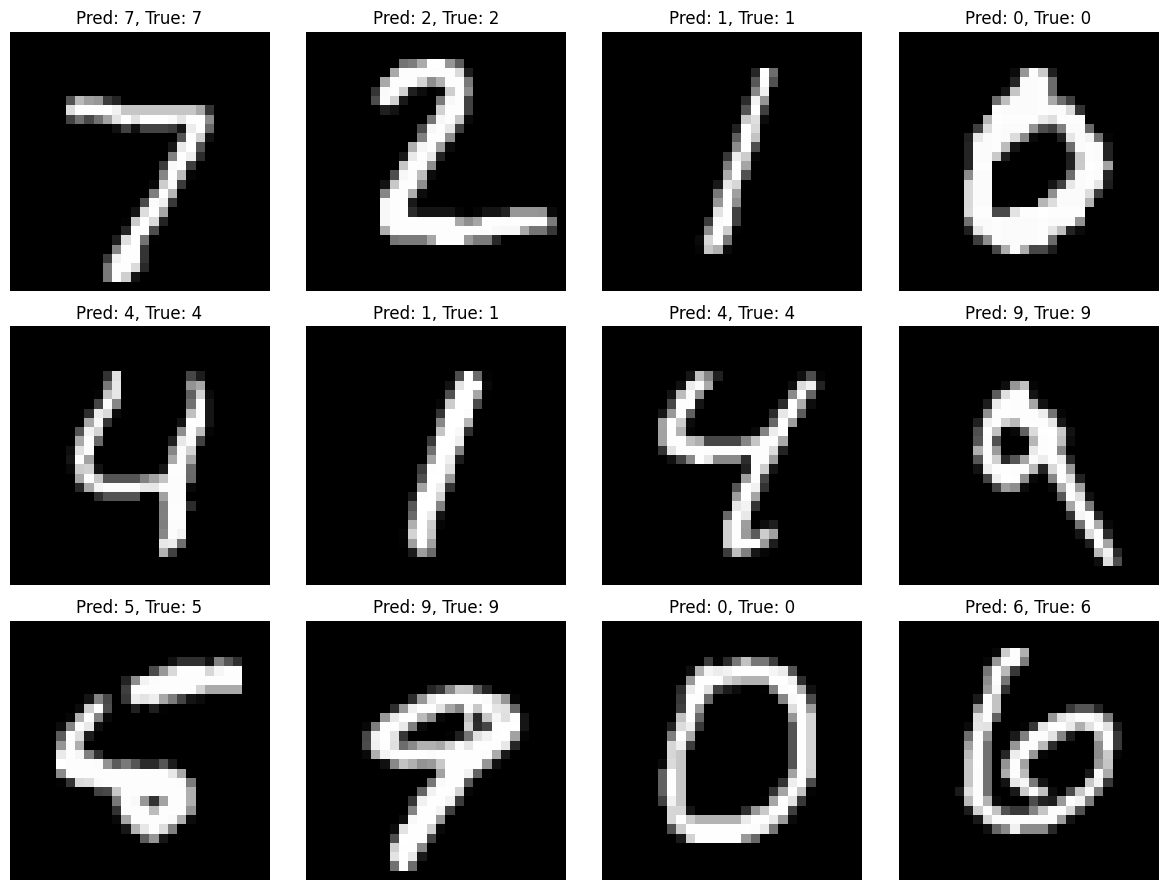

In [80]:
def plot_predictions(model, X_test, y_test, num_images=12):
    preds = model.predict(X_test[:num_images])
    true_labels = y_test[:num_images]

    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.ravel()

    for i in range(num_images):
        img = X_test[i].reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Pred: {preds[i]}, True: {true_labels[i]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_predictions(model, X_test, y_test)